In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_energy = pd.read_csv('./all_energy.csv')
all_energy = all_energy[all_energy["YYYYMM"].astype(str).str.contains("13")]
all_energy["Year"] = all_energy["YYYYMM"].astype(str).str[:-2].astype(np.int64)
all_energy = all_energy[all_energy['Value']!="Not Available"]
all_energy['Value'] = pd.to_numeric(all_energy['Value'])
all_energy = all_energy.drop(all_energy.loc[8596:8607].index)
all_energy = all_energy[all_energy["Year"] >= 1984]

In [4]:
fossil_fuels = all_energy[all_energy["Description"]== "Total Fossil Fuels Production"]
fossil_fuels = fossil_fuels.drop(fossil_fuels.loc[3228:3239].index)


In [5]:
nuclear = all_energy[all_energy["Description"]== "Nuclear Electric Power Production"]
nuclear = nuclear.drop(nuclear.loc[3899:3910].index)


In [6]:
hydro = all_energy[all_energy["Description"]== "Hydroelectric Power Production"]
hydro = hydro.drop(hydro.loc[4570:4581].index)


In [7]:
solar = all_energy[all_energy["Description"]== "Solar Energy Production"]
solar = solar.drop(solar.loc[5912:5923].index)


In [8]:
wind = all_energy[all_energy["Description"]== "Wind Energy Production"]
wind = wind.drop(wind.loc[6583:6594].index)

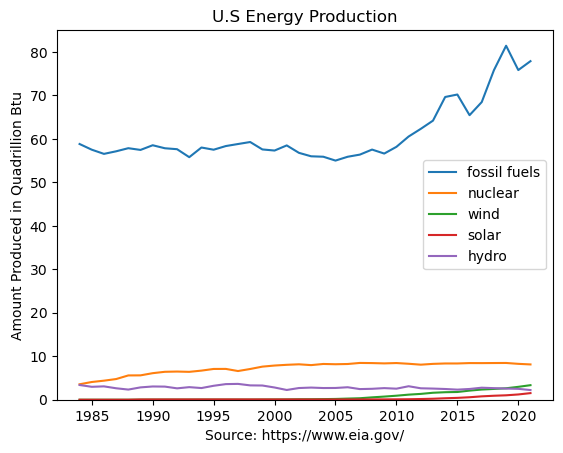

In [9]:
x = fossil_fuels["Year"]
fossil_y = fossil_fuels["Value"]
nuclear_y = nuclear["Value"]
wind_y = wind["Value"]
solar_y = solar["Value"]
hydro_y = hydro["Value"]
plt.plot(x, fossil_y)
plt.plot(x, nuclear_y)
plt.plot(x, wind_y)
plt.plot(x,solar_y)
plt.plot(x,hydro_y)
plt.ylim(0,85)
plt.ylabel("Amount Produced in Quadrillion Btu")
plt.xlabel("Source: https://www.eia.gov/")
plt.title("U.S Energy Production")
plt.legend(['fossil fuels', 'nuclear', 'wind', 'solar', 'hydro'])
plt.savefig("energyproduction.png")
plt.show()


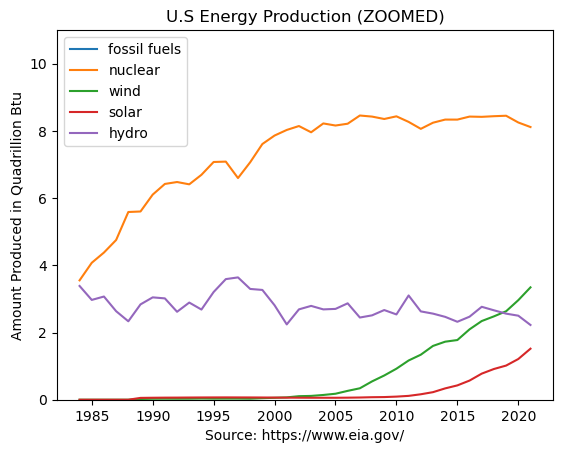

In [10]:
x = fossil_fuels["Year"]
fossil_y = fossil_fuels["Value"]
nuclear_y = nuclear["Value"]
wind_y = wind["Value"]
solar_y = solar["Value"]
hydro_y = hydro["Value"]
plt.plot(x, fossil_y)
plt.plot(x, nuclear_y)
plt.plot(x, wind_y)
plt.plot(x,solar_y)
plt.plot(x,hydro_y)
plt.ylim(0,11)
plt.ylabel("Amount Produced in Quadrillion Btu")
plt.title("U.S Energy Production (ZOOMED)")
plt.xlabel("Source: https://www.eia.gov/")
plt.legend(['fossil fuels', 'nuclear', 'wind', 'solar', 'hydro'])
plt.savefig("energyproduction2.png")
plt.show()

In [171]:
f2001 = fossil_fuels[fossil_fuels["Year"] == 2001]["Value"].values[0]
f2021 = fossil_fuels[fossil_fuels["Year"] == 2021]["Value"].values[0]
f_change = round((f2021 - f2001)/f2001 * 100,2)

n2001 = nuclear[nuclear["Year"] == 2001]["Value"].values[0]
n2021 = nuclear[nuclear["Year"] == 2021]["Value"].values[0]
n_change = round((n2021 - n2001)/n2001 * 100,2)

w2001 = wind[wind["Year"] == 2001]["Value"].values[0]
w2021 = wind[wind["Year"] == 2021]["Value"].values[0]
w_change = round((w2021 - w2001)/w2001 * 100,2)

s2001 = solar[solar["Year"] == 2001]["Value"].values[0]
s2021 = solar[solar["Year"] == 2021]["Value"].values[0]
s_change = round((s2021 - s2001)/s2001 * 100,2)

h2001 = hydro[hydro["Year"] == 2001]["Value"].values[0]
h2021 = hydro[hydro["Year"] == 2021]["Value"].values[0]
h_change = round((h2021 - h2001)/h2001 * 100,2)



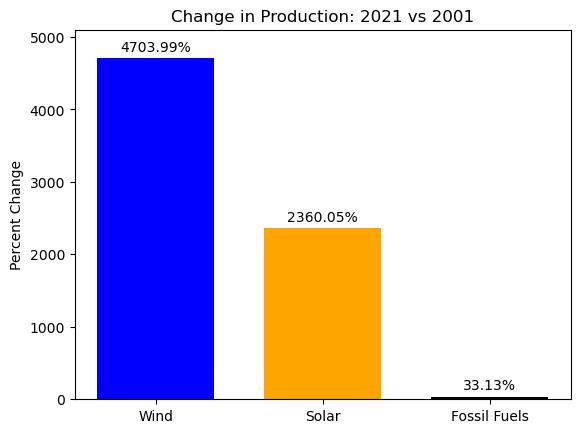

<Figure size 640x480 with 0 Axes>

In [192]:
x = [ "Wind", "Solar", "Fossil Fuels"]
y = [ w_change, s_change, f_change]
colors = ["blue", "orange", "black"]
labels = [ f"{w_change}%", f"{s_change}%", f"{f_change}%"]

barplot = plt.bar(x,y, width = 0.7, color= colors)
plt.title("Change in Production: 2021 vs 2001")
plt.ylim(0,5100)
plt.bar_label(barplot, labels=labels, label_type="edge", padding=3, fmt='%0.00f%%')
plt.ylabel("Percent Change")
plt.show()
plt.savefig("Percent_Change_Production.png")

<BarContainer object of 3 artists>

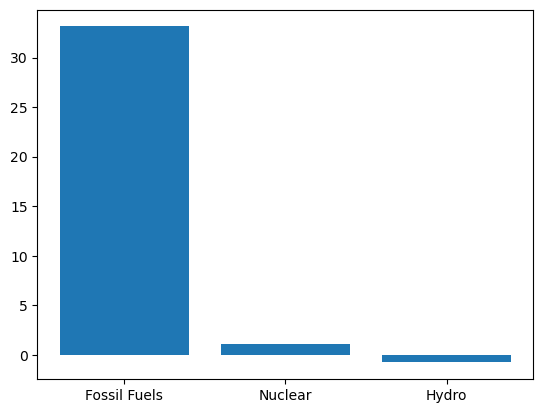

In [144]:
x = ["Fossil Fuels", "Nuclear", "Hydro"]
y = [f_change, n_change, h_change]

plt.bar(x,y)